In [81]:
import pandas as pd
import numpy as np 
import PIL
import matplotlib 
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from os import path 
import re 
import nltk 
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer
import string
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
names_columns = ['sentiment', 'tweet_id', 'date_time', 'query', 'user_id', 'text']
dataframe = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin-1', header = None, names = names_columns)
dataframe.head(5)

,sentiment,tweet_id,date_time,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [83]:
#Obtain 10 tweets with polarity as 0 (these indicate negative tweets)
dataframe[dataframe.sentiment == 0].head(10)

,sentiment,tweet_id,date_time,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [84]:
#Obtain 10 tweets with polarity as 4 (these indicate positive tweets)
dataframe[dataframe.sentiment == 4].head(10)

,sentiment,tweet_id,date_time,query,user_id,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
800005,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just bu...
800006,4,1467822447,Mon Apr 06 22:22:51 PDT 2009,NO_QUERY,vmdavinci,@r_keith_hill Thans for your response. Ihad al...
800007,4,1467822465,Mon Apr 06 22:22:48 PDT 2009,NO_QUERY,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,1467822489,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [85]:
#Though the documentation mentions a polarity of 2 indicating neutral tweets, they do not exist in the dataset 
dataframe = dataframe[dataframe.sentiment != 2]
dataframe

,sentiment,tweet_id,date_time,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [86]:
dataframe[dataframe.sentiment == 2].head(10)

,sentiment,tweet_id,date_time,query,user_id,text


In [87]:
len(dataframe)

1600000

In [88]:
cols = ['tweet_id', 'date_time', 'query', 'user_id']
dataframe.drop(cols, axis = 1, inplace = True)
dataframe.head(5)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


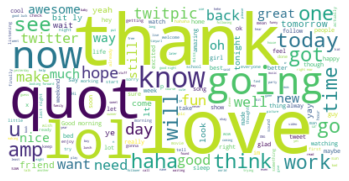

In [89]:
#wordcloud for positive words contained in text including stopwords
wordcloud_text_positive = " ".join(t for t in dataframe[dataframe.sentiment == 4].text)
wordcloud = WordCloud(background_color="white").generate(wordcloud_text_positive)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

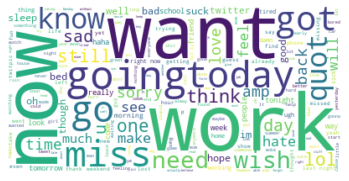

In [90]:
#wordcloud for negative words contained in text including stopwords
wordcloud_text_negative = " ".join(t for t in dataframe[dataframe.sentiment == 0].text)
wordcloud = WordCloud(background_color="white").generate(wordcloud_text_negative)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

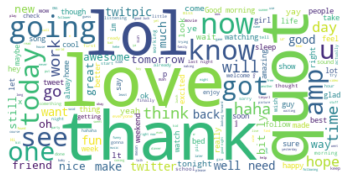

In [91]:
#wordcloud for positive words contained in text 
stopwords = set(STOPWORDS)
wordcloud_text_positive_nostop = " ".join(t for t in dataframe[dataframe.sentiment == 4].text)
wordcloud = WordCloud(background_color="white", stopwords = stopwords).generate(wordcloud_text_positive_nostop)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

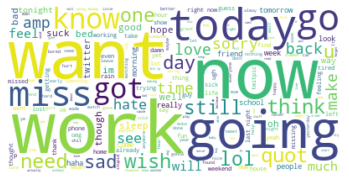

In [92]:
#wordcloud for negative words contained in text 
wordcloud_text_negative_nostop = " ".join(t for t in dataframe[dataframe.sentiment == 0].text)
wordcloud = WordCloud(background_color="white", stopwords = stopwords).generate(wordcloud_text_negative_nostop)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:
#replace the sentiment value 0 with 0 and 4 with 1 for uniformity
dataframe.sentiment = dataframe.sentiment.replace({0: 0, 4: 1})

In [94]:
pos_tweets = dataframe[dataframe.sentiment == 1]
neg_tweets = dataframe[dataframe.sentiment == 0]
print(pos_tweets)
print(neg_tweets)

         sentiment                                               text
800000           1       I LOVE @Health4UandPets u guys r the best!! 
800001           1  im meeting up with one of my besties tonight! ...
800002           1  @DaRealSunisaKim Thanks for the Twitter add, S...
800003           1  Being sick can be really cheap when it hurts t...
800004           1    @LovesBrooklyn2 he has that effect on everyone 
...            ...                                                ...
1599995          1  Just woke up. Having no school is the best fee...
1599996          1  TheWDB.com - Very cool to hear old Walt interv...
1599997          1  Are you ready for your MoJo Makeover? Ask me f...
1599998          1  Happy 38th Birthday to my boo of alll time!!! ...
1599999          1  happy #charitytuesday @theNSPCC @SparksCharity...

[800000 rows x 2 columns]
        sentiment                                               text
0               0  @switchfoot http://twitpic.com/2y1zl - Awww, 

In [95]:
dataframe['text'] = dataframe['text'].astype('str')

In [96]:
#divide the dataset into training and test set
positive_tweets_train = dataframe.text[800001 : 1399999].tolist()
negative_tweets_train = dataframe.text[0:599999].tolist()
positive_tweets_test = dataframe.text[1399999:1599999].tolist()
negative_tweets_test = dataframe.text[600000:800000].tolist()
train_x =  positive_tweets_train + negative_tweets_train
train_y = np.append(np.ones((len(positive_tweets_train), 1)), np.zeros((len(negative_tweets_train), 1)), axis=0)
test_x = positive_tweets_test + negative_tweets_test
test_y = np.append(np.ones((len(positive_tweets_test), 1)), np.zeros((len(negative_tweets_test), 1)), axis=0)

In [97]:
len(train_x)

1199997

In [98]:
train_y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [99]:
#a fucntion that pre-processes the tweets
import re 
import nltk 
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer
import string
from nltk.corpus import stopwords 
def cleaning(tweet):
    
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    tweet = re.sub(r'#', '', tweet)
    #tokenize the tweets 
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)
    #remove stop words and punctuations
    stop_words = stopwords.words('english') 
    #stop_words = list() 
    #with open('stopwords.txt','r') as file:
        #for stopword in file:
            #stop_words.append(stopword)
    cleaned_tweets = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    #stem the words to their root word
    stemmer = PorterStemmer()
    stemmed = [] 
    for word in cleaned_tweets:
        word=stemmer.stem(word)
        stemmed.append(word)
    return stemmed

In [100]:
#CREATE FREQUENCY DICTIONARY 
#create a dictionary of negative words and their frequency 
negative = [] 
for tweet in negative_tweets_train:
    tweet = cleaning(tweet)
    for word in tweet: 
        negative.append(word)
neg_freq = {}
for word in negative:
    if (word,0) not in neg_freq:
        neg_freq[(word,0)] = 1
    else:
        neg_freq[(word,0)] += 1

In [101]:
neg_freq

{("that'", 0): 6776,
 ('bummer', 0): 1027,
 ('shoulda', 0): 198,
 ('got', 0): 25127,
 ('david', 0): 934,
 ('carr', 0): 25,
 ('third', 0): 336,
 ('day', 0): 36781,
 (';D', 0): 207,
 ('upset', 0): 2086,
 ("can't", 0): 23811,
 ('updat', 0): 3586,
 ('facebook', 0): 1562,
 ('text', 0): 2270,
 ('...', 0): 115916,
 ('might', 0): 3486,
 ('cri', 0): 5590,
 ('result', 0): 659,
 ('school', 0): 10754,
 ('today', 0): 28357,
 ('also', 0): 3604,
 ('blah', 0): 961,
 ('dive', 0): 91,
 ('mani', 0): 3585,
 ('time', 0): 23872,
 ('ball', 0): 873,
 ('manag', 0): 1027,
 ('save', 0): 1473,
 ('50', 0): 540,
 ('rest', 0): 2042,
 ('go', 0): 59147,
 ('bound', 0): 130,
 ('whole', 0): 2580,
 ('bodi', 0): 1371,
 ('feel', 0): 27627,
 ('itchi', 0): 319,
 ('like', 0): 32303,
 ('fire', 0): 746,
 ('behav', 0): 71,
 ("i'm", 0): 55490,
 ('mad', 0): 2171,
 ('see', 0): 16828,
 ('crew', 0): 222,
 ('need', 0): 19805,
 ('hug', 0): 2105,
 ('hey', 0): 3775,
 ('long', 0): 7151,
 ('ye', 0): 4517,
 ('..', 0): 39820,
 ('rain', 0): 91

In [102]:
#create a dicitonary of positive words and their frequency 
positive = []
for tweet in positive_tweets_train:  
    tweet = cleaning(tweet)
    for word in tweet: 
        positive.append(word)
pos_freq = {}
for word in positive: 
    if (word,1) not in pos_freq:
        pos_freq[(word,1)]=1
    else:
        pos_freq[(word,1)] +=1

In [103]:
pos_freq

{('im', 1): 14625,
 ('meet', 1): 4139,
 ('one', 1): 20924,
 ('besti', 1): 358,
 ('tonight', 1): 9628,
 ('cant', 1): 3833,
 ('wait', 1): 13859,
 ('girl', 1): 6900,
 ('talk', 1): 5596,
 ('thank', 1): 39133,
 ('twitter', 1): 16020,
 ('add', 1): 1765,
 ('sunisa', 1): 1,
 ('got', 1): 20930,
 ('hin', 1): 8,
 ('show', 1): 7879,
 ('dc', 1): 292,
 ('area', 1): 500,
 ('sweetheart', 1): 247,
 ('sick', 1): 1106,
 ('realli', 1): 13925,
 ('cheap', 1): 371,
 ('hurt', 1): 992,
 ('much', 1): 12815,
 ('eat', 1): 5512,
 ('real', 1): 2641,
 ('food', 1): 2873,
 ('plu', 1): 949,
 ('friend', 1): 10122,
 ('make', 1): 15913,
 ('soup', 1): 407,
 ('effect', 1): 372,
 ('everyon', 1): 6930,
 ('tell', 1): 5146,
 ('burst', 1): 64,
 ('laugh', 1): 2282,
 ('loud', 1): 379,
 ('come', 1): 14168,
 ('sulk', 1): 16,
 ('than', 1): 5,
 ('respons', 1): 424,
 ('ihad', 1): 4,
 ('alreadi', 1): 4094,
 ('find', 1): 4269,
 ('answer', 1): 1267,
 ('jealou', 1): 903,
 ('hope', 1): 18502,
 ('great', 1): 19325,
 ('time', 1): 25569,
 ('ve

In [104]:
#combine the positive and negative dictionaries
freq = dict(pos_freq)
freq.update(neg_freq)

In [105]:
freq

{('im', 1): 14625,
 ('meet', 1): 4139,
 ('one', 1): 20924,
 ('besti', 1): 358,
 ('tonight', 1): 9628,
 ('cant', 1): 3833,
 ('wait', 1): 13859,
 ('girl', 1): 6900,
 ('talk', 1): 5596,
 ('thank', 1): 39133,
 ('twitter', 1): 16020,
 ('add', 1): 1765,
 ('sunisa', 1): 1,
 ('got', 1): 20930,
 ('hin', 1): 8,
 ('show', 1): 7879,
 ('dc', 1): 292,
 ('area', 1): 500,
 ('sweetheart', 1): 247,
 ('sick', 1): 1106,
 ('realli', 1): 13925,
 ('cheap', 1): 371,
 ('hurt', 1): 992,
 ('much', 1): 12815,
 ('eat', 1): 5512,
 ('real', 1): 2641,
 ('food', 1): 2873,
 ('plu', 1): 949,
 ('friend', 1): 10122,
 ('make', 1): 15913,
 ('soup', 1): 407,
 ('effect', 1): 372,
 ('everyon', 1): 6930,
 ('tell', 1): 5146,
 ('burst', 1): 64,
 ('laugh', 1): 2282,
 ('loud', 1): 379,
 ('come', 1): 14168,
 ('sulk', 1): 16,
 ('than', 1): 5,
 ('respons', 1): 424,
 ('ihad', 1): 4,
 ('alreadi', 1): 4094,
 ('find', 1): 4269,
 ('answer', 1): 1267,
 ('jealou', 1): 903,
 ('hope', 1): 18502,
 ('great', 1): 19325,
 ('time', 1): 25569,
 ('ve

In [106]:
#A lookup function to find a specific word in the dictionary and return it along with its frequency 
def lookup(freqs, word, label):
    count = 0
    val = (word, label)
    if (val in freqs):
        count = freqs[val]
    return count

# NAIVE BAYES

In [107]:
def naive_bayes(freq, x_train, y_train):
    #unique words in the dicitonary 
    vocabulary = set([val[0] for val in freq.keys()])
    vocab_length = len(vocabulary)
    priorprob_log = 0;
    likelihood = {}
    number_positive = 0
    number_negative = 0
    freq_neg_word = 0
    freq_pos_word  = 0
    for val in freq.keys():
        if val[1]>0:
            number_positive += freq.get(val,1)
            
        else:
            number_negative += freq.get(val,1) 
    #total number of tweets
    number_of_tweets = len(y_train)
    #number of positive tweets
    positive = sum(y_train)
    #number of negative tweets 
    negative = number_of_tweets - positive
    #prior probability in log form 
    priorprob_log = np.log(positive) - np.log(negative)
    for word in vocabulary: 
        #get positive and negative frequency of every word in vocabulary 
        freq_pos_word = lookup(freq, word, 1)
        freq_neg_word = lookup(freq, word, 0)
        #Use laplacian smoothing
        prob_pos = (freq_pos_word + 1)/(number_positive+vocab_length)
        prob_neg = (freq_neg_word + 1)/(number_negative+vocab_length)
        #calculate the value of likelihood
        likelihood[word] = np.log(prob_pos/prob_neg)
    return priorprob_log, likelihood

In [108]:
priorprob, likelihood = naive_bayes(freq, train_x, train_y)
print(priorprob)
print(len(likelihood))

[-1.66667083e-06]
224185


In [109]:
def pred(tweet, priorprob, likelihood):
    prob = 0
    #preprocess the tweet
    words = cleaning(tweet)
    prob = prob+priorprob
    for word in words:
        #if word exists in likelihood, then add the log of that value to the probability
        if word in likelihood:
            prob = prob+likelihood[word]
    return prob

In [110]:
from sklearn.metrics import accuracy_score
def test(priorprob, likelihood, x_test, y_test):
    acc = 0
    #store predicted values of y
    predicted_y = []
    for tweet in x_test:
        #if value is less than 0, then negative
        if pred(tweet, priorprob, likelihood) < 0:
            predicted_y.append(0)
        else:
            #else positive
            predicted_y.append(1)
    #obtain accuracy
    acc = accuracy_score(y_test, predicted_y)
    return acc

In [111]:
tweet = 'good, great, amazing, lovely.'
p = pred(tweet, priorprob, likelihood)
print(p)

[4.26432407]


In [112]:
print("The obtained accuracy for Naive Bayes (built) is = %0.2f" %
      (test(priorprob, likelihood, test_x, test_y)))

The obtained accuracy for Naive Bayes (built) is = 0.76


# LOGISTIC REGRESSION

In [113]:
np.warnings.filterwarnings('ignore', '(overflow|invalid)')
def sigmoid(z): 
    h = 1 / (1 + np.exp(-z))
    return h

In [114]:
def gradient_descent(x, y, theta, alpha, iterations, c):
    m = x.shape[0]
    #add the term epsilon in order to prevent any infinite values
    epsilon = 1e-5  
    for i in range(0, iterations):
        z = np.dot(x, theta)
        h = sigmoid(z)
        #compute the cost
        J = (-1/m) * ((np.dot(y.T, np.log(h+epsilon)) + np.dot((1 - y).T, np.log(1-h+epsilon))) + (c * np.sum(theta)))
        #compute the vector of weights
        theta = theta - (alpha / m) * np.dot((x.T), (h - y))
    J = float(J)
    return J, theta

In [115]:
def feature_extraction(tweet, freqs):
    words = cleaning(tweet)
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    for word in words:
        if (word,1) in freqs:
            x[0,1] += freqs[(word,1)]
        if (word,0) in freqs:
            x[0,2] += freqs[(word,0)]
    assert(x.shape == (1, 3))
    return x

In [116]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= feature_extraction(train_x[i], freq)
Y = train_y
#Perform gradient descent in order to obtain the values of J and theta 
J, theta = gradient_descent(X, Y, np.zeros((3, 1)), 1e-11, 1250, 0.1)
print(f"The cost, J is {J:.8f}.")
print(f"The vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost, J is 0.63444509.
The vector of weights is [0.0, 1.961e-05, -1.765e-05]


In [117]:
def prediction_tweet(tweet, freq, theta):
    #extract the features
    x = feature_extraction(tweet, freq)
    z = np.dot(x,theta)
    #obtain the prediction (either 0 or 1)
    pred = sigmoid(z)
    return pred

In [118]:
def logistic_regression(x_test, y_test, freq, theta):
    #list containing predicted values
    predicted_y = []
    for tweet in x_test:
        prediction = prediction_tweet(tweet, freq, theta)
        #if the prediction obtained is greater than 0.5, then label it as positive
        if prediction > 0.5:
            predicted_y.append(1)
        else:
        #else negative
            predicted_y.append(0)
    #compute the accuracy 
    #use squeeze to convert y_test to the same dimension as predicted_y
    accuracy = (predicted_y==np.squeeze(y_test)).sum()/len(x_test)
    return accuracy

In [119]:
test_accuracy = logistic_regression(test_x, test_y, freq, theta)
print(f"Logistic regression model's accuracy = {test_accuracy:.4f}")

Logistic regression model's accuracy = 0.6936


# USING SKLEARN 

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(train_x)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [122]:
x_train_transformed = vectoriser.transform(train_x)
x_test_transformed  = vectoriser.transform(test_x)

In [123]:
from sklearn.metrics import confusion_matrix, classification_report
def modelevaluation(model):
    predicted_y = model.predict(x_test_transformed)
    print(classification_report(test_y, predicted_y))
    cm = confusion_matrix(test_y, predicted_y)

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
logreg.fit(x_train_transformed, train_y.ravel())
modelevaluation(logreg)

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82    200000
         1.0       0.82      0.82      0.82    200000

    accuracy                           0.82    400000
   macro avg       0.82      0.82      0.82    400000
weighted avg       0.82      0.82      0.82    400000



In [125]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train_transformed, train_y.ravel())
modelevaluation(model)

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79    200000
         1.0       0.79      0.79      0.79    200000

    accuracy                           0.79    400000
   macro avg       0.79      0.79      0.79    400000
weighted avg       0.79      0.79      0.79    400000

